In [190]:
import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [224]:
df = pd.read_csv('Resources/uswhites.csv')

In [225]:
df.head()

,ID,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,94,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,39,12.6,White,US,"Stunning aromatics combine spicy citrus, tangy...",Maresh Vineyard Old Vine,30.0,94,Oregon,Willamette Valley,Dundee Hills,Harper Voit 2016 Maresh Vineyard Old Vine Ries...,https://www.winemag.com/buying-guide/harper-vo...,Riesling,2016,Harper Voit
2,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,94,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
3,56,13.8,White,US,The wine's aromas are arresting in notes of le...,Chaleur Blanc,35.0,94,Washington,Columbia Valley,Columbia Valley (WA),DeLille 2017 Chaleur Blanc White (Columbia Val...,https://www.winemag.com/buying-guide/delille-2...,Bordeaux-style White Blend,2017,DeLille
4,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,94,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem


In [226]:
df = df.drop(['ID', 'category', 'country', 'description', 'designation', 'subsubregion', 'title', 'url', 'winery'], axis=1)
df.head()

,alcohol,price,rating,region,subregion,varietal,vintage
0,14.1,50.0,94,California,Sonoma,Chardonnay,2016
1,12.6,30.0,94,Oregon,Willamette Valley,Riesling,2016
2,13.8,60.0,94,California,Napa-Sonoma,Chardonnay,2016
3,13.8,35.0,94,Washington,Columbia Valley,Bordeaux-style White Blend,2017
4,14.7,65.0,94,California,Sonoma,Chardonnay,2016


In [227]:
# X_df = pd.DataFrame(df)
df['subregion'] = df['subregion'].astype(str)
df['vintage'] = df['vintage'].astype(int)

In [232]:
df = df.apply(LabelEncoder().fit_transform)
df

,alcohol,price,rating,region,subregion,varietal,vintage
0,130,63,14,2,42,17,22
1,68,42,14,17,56,87,22
2,118,73,14,2,28,17,22
3,118,48,14,24,7,10,23
4,152,78,14,2,42,17,22
...,...,...,...,...,...,...,...
23653,147,36,11,2,3,17,11
23654,147,42,12,2,3,17,11
23655,159,40,12,2,3,17,11
23656,176,33,12,2,42,138,10


In [195]:
X = df.drop("price", axis=1)
y = df["price"]

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(5915,)
(5915, 6)


In [240]:
scaler_model = MinMaxScaler()

In [241]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [242]:
X_scaler = scaler_model.fit(X_train)

In [243]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [244]:
input_dims = X_train.shape[1]
input_dims

6

In [245]:
model = Sequential()
model.add(Dense(12, activation = 'relu', name='dense_1', kernel_initializer='random_uniform', input_dim=(input_dims)))
model.add(Dense(8, activation='relu', name='dense_2', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
predictions (Dense)          (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [246]:
import numpy as np

In [247]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=10,  verbose=1, validation_split=0.2)


Train on 14194 samples, validate on 3549 samples
Epoch 1/1000
14194/14194 [==============================] - 1s 103us/step - loss: 0.0177 - mse: 0.0177 - mae: 0.1032 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0962
Epoch 2/1000
14194/14194 [==============================] - 1s 84us/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0936 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0928
Epoch 3/1000
14194/14194 [==============================] - 1s 80us/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0928 - val_loss: 0.0137 - val_mse: 0.0137 - val_mae: 0.0926
Epoch 4/1000
14194/14194 [==============================] - 1s 77us/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0925 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0929
Epoch 5/1000
14194/14194 [==============================] - 1s 80us/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0922 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0933
Epoch 6/1000
14194/14194 [==============================] - 1s 82us/step - loss: 0.0138 - mse: 

14194/14194 [==============================] - 1s 79us/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0888 - val_loss: 0.0141 - val_mse: 0.0141 - val_mae: 0.0907
Epoch 49/1000
14194/14194 [==============================] - 1s 75us/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0888 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0904
Epoch 50/1000
14194/14194 [==============================] - 1s 85us/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0887 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0886
Epoch 51/1000
14194/14194 [==============================] - 1s 88us/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0887 - val_loss: 0.0132 - val_mse: 0.0132 - val_mae: 0.0885
Epoch 52/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0886 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0902
Epoch 53/1000
14194/14194 [==============================] - 1s 86us/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0885 - val_loss: 0.0130 - val_mse: 0.0130 

Epoch 96/1000
14194/14194 [==============================] - 1s 88us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0881 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0891
Epoch 97/1000
14194/14194 [==============================] - 1s 89us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0882 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0879
Epoch 98/1000
14194/14194 [==============================] - 1s 92us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0880 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0890
Epoch 99/1000
14194/14194 [==============================] - 1s 85us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0882 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0878
Epoch 100/1000
14194/14194 [==============================] - 1s 87us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0882 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0880
Epoch 101/1000
14194/14194 [==============================] - 1s 89us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0881 - val_loss: 0.0128 - 

14194/14194 [==============================] - 2s 112us/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0880 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0886
Epoch 144/1000
14194/14194 [==============================] - 2s 111us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0879 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0878
Epoch 145/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0879 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0883
Epoch 146/1000
14194/14194 [==============================] - 2s 117us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0879 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0887
Epoch 147/1000
14194/14194 [==============================] - 2s 111us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0878 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0878
Epoch 148/1000
14194/14194 [==============================] - 2s 108us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0878 - val_loss: 0.0127 - val_m

14194/14194 [==============================] - 1s 100us/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0876 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0879
Epoch 191/1000
14194/14194 [==============================] - 2s 109us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0876 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0887
Epoch 192/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0875 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0881
Epoch 193/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0876 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0875
Epoch 194/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0876 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0887
Epoch 195/1000
14194/14194 [==============================] - 1s 103us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0876 - val_loss: 0.0126 - val_ms

14194/14194 [==============================] - 1s 98us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0876 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0884
Epoch 238/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0875 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0872
Epoch 239/1000
14194/14194 [==============================] - 1s 105us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0874 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0878
Epoch 240/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0870
Epoch 241/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0874 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0880
Epoch 242/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0874 - val_loss: 0.0138 - val_mse:

14194/14194 [==============================] - 1s 100us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0874 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0877
Epoch 285/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0882
Epoch 286/1000
14194/14194 [==============================] - 1s 96us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0871
Epoch 287/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0871
Epoch 288/1000
14194/14194 [==============================] - 1s 89us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0874 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0870
Epoch 289/1000
14194/14194 [==============================] - 1s 92us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 

14194/14194 [==============================] - 1s 104us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0871
Epoch 332/1000
14194/14194 [==============================] - 1s 96us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0884
Epoch 333/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0876
Epoch 334/1000
14194/14194 [==============================] - 2s 108us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0871 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0872
Epoch 335/1000
14194/14194 [==============================] - 1s 94us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0872 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0876
Epoch 336/1000
14194/14194 [==============================] - 1s 94us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0127 - val_mse:

14194/14194 [==============================] - 1s 100us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0879
Epoch 379/1000
14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0876
Epoch 380/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0879
Epoch 381/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0872
Epoch 382/1000
14194/14194 [==============================] - 2s 107us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0874
Epoch 383/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0873 - val_loss: 0.0127 - val_mse

14194/14194 [==============================] - 2s 137us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0886
Epoch 426/1000
14194/14194 [==============================] - 2s 120us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0870
Epoch 427/1000
14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0870
Epoch 428/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0872
Epoch 429/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0890
Epoch 430/1000
14194/14194 [==============================] - 1s 105us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0872 - val_loss: 0.0126 - val_m

14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0872
Epoch 473/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0874
Epoch 474/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0885
Epoch 475/1000
14194/14194 [==============================] - 1s 97us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0889
Epoch 476/1000
14194/14194 [==============================] - 2s 108us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0890
Epoch 477/1000
14194/14194 [==============================] - 2s 110us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 

14194/14194 [==============================] - 1s 91us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0872
Epoch 520/1000
14194/14194 [==============================] - 1s 96us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0873
Epoch 521/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0875
Epoch 522/1000
14194/14194 [==============================] - 1s 92us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0873
Epoch 523/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0879
Epoch 524/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0.

14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0872
Epoch 567/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0881
Epoch 568/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0871
Epoch 569/1000
14194/14194 [==============================] - 1s 103us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0875
Epoch 570/1000
14194/14194 [==============================] - 1s 96us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0873
Epoch 571/1000
14194/14194 [==============================] - 1s 97us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0

14194/14194 [==============================] - 1s 96us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0871
Epoch 614/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0871
Epoch 615/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0871 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0872
Epoch 616/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0875
Epoch 617/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0874
Epoch 618/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0128 - val_mse: 0

14194/14194 [==============================] - 1s 94us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0883
Epoch 661/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0878
Epoch 662/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0869 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0887
Epoch 663/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0887
Epoch 664/1000
14194/14194 [==============================] - 1s 98us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0871 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0875
Epoch 665/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.

14194/14194 [==============================] - 1s 104us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0870
Epoch 708/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0874
Epoch 709/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0870
Epoch 710/1000
14194/14194 [==============================] - 1s 102us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0891
Epoch 711/1000
14194/14194 [==============================] - 1s 102us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0884
Epoch 712/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_ms

14194/14194 [==============================] - 1s 105us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0871
Epoch 755/1000
14194/14194 [==============================] - 1s 95us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0871 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0871
Epoch 756/1000
14194/14194 [==============================] - 1s 103us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0883
Epoch 757/1000
14194/14194 [==============================] - 1s 102us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0889
Epoch 758/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0868 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0870
Epoch 759/1000
14194/14194 [==============================] - 1s 105us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_ms

14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0872
Epoch 802/1000
14194/14194 [==============================] - 1s 97us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0871
Epoch 803/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0893
Epoch 804/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0879
Epoch 805/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0867 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0872
Epoch 806/1000
14194/14194 [==============================] - 1s 100us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0868 - val_loss: 0.0126 - val_mse

14194/14194 [==============================] - 2s 109us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0871
Epoch 849/1000
14194/14194 [==============================] - 2s 115us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0868 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0884
Epoch 850/1000
14194/14194 [==============================] - 2s 110us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0869
Epoch 851/1000
14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0874
Epoch 852/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0874
Epoch 853/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_ms

14194/14194 [==============================] - 2s 111us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0870
Epoch 896/1000
14194/14194 [==============================] - 1s 104us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0868 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0869
Epoch 897/1000
14194/14194 [==============================] - 1s 105us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0867 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0873
Epoch 898/1000
14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0870
Epoch 899/1000
14194/14194 [==============================] - 2s 109us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0871
Epoch 900/1000
14194/14194 [==============================] - 1s 102us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_m

14194/14194 [==============================] - 1s 94us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0868 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0876
Epoch 943/1000
14194/14194 [==============================] - 1s 103us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0873
Epoch 944/1000
14194/14194 [==============================] - 1s 99us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0869
Epoch 945/1000
14194/14194 [==============================] - 1s 96us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0882
Epoch 946/1000
14194/14194 [==============================] - 1s 94us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0884
Epoch 947/1000
14194/14194 [==============================] - 1s 101us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 

14194/14194 [==============================] - 2s 113us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0869 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0874
Epoch 990/1000
14194/14194 [==============================] - 2s 106us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0868 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0878
Epoch 991/1000
14194/14194 [==============================] - 2s 107us/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0867 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0873
Epoch 992/1000
14194/14194 [==============================] - 2s 110us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0872
Epoch 993/1000
14194/14194 [==============================] - 2s 112us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0876
Epoch 994/1000
14194/14194 [==============================] - 2s 115us/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0870 - val_loss: 0.0126 - val_m

In [248]:
error = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))

[0.01249292372762905, 0.012492927722632885, 0.0879480168223381] [0.11177175 0.11177177 0.29656031]


In [249]:
model.save('model8.h5')

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


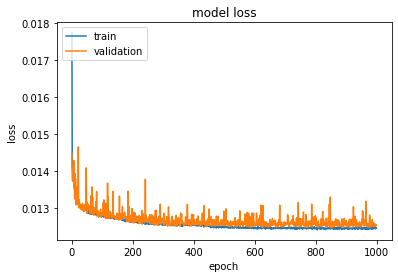

In [250]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [251]:
X_test[0]

array([135.,  12.,   2.,   3.,  17.,  14.], dtype=float32)

In [252]:
test = np.expand_dims(X_test[0], axis=0)

In [253]:
print(f"Predicted price: {model.predict(test)}")

Predicted price: [[4.9008613]]
